In [157]:
import time

import numpy as np
from sklearn.neighbors import BallTree
from astroML.correlation import two_point

import matplotlib
import matplotlib.pyplot as plt

np.random.seed(0)
plt.rcParams['figure.figsize'] = [12, 7]
matplotlib.rcParams.update({'font.size': 14})
matplotlib.rcParams.update({'xtick.major.size': 4})
matplotlib.rcParams.update({'xtick.major.width': 1})
matplotlib.rcParams.update({'xtick.minor.size': 4})
matplotlib.rcParams.update({'xtick.minor.width': 1})
matplotlib.rcParams.update({'ytick.major.size': 4})
matplotlib.rcParams.update({'ytick.major.width': 1})
matplotlib.rcParams.update({'ytick.minor.size': 4})
matplotlib.rcParams.update({'ytick.minor.width': 1})

In [6]:
def runtime2str(t):
    if t < 1e-6:
        s = "{:.3g} ns".format(t * 1e9)
    elif 1e-6 <= t < 1e-3:
        s = "{:.3g} μs".format(t * 1e6)
    elif 1e-3 < t < 1:
        s = "{:.3g} ms".format(t * 1e3)
    else:
        s = "{:.3g} s".format(t)
    return s

In [31]:
R = 6371.228e3 # average radius of the earth [m]

# Calculate distance in meters between two points (ϕ1, λ1) and (ϕ2, λ2)
# on the Earth's surface using the haversine formula. ϕ denotes the latitude
# while λ denotes the longitude.
# See: http://www.movable-type.co.uk/scripts/latlong.html
def haversine_distance(ϕ1, λ1, ϕ2, λ2):
    ϕ1, λ1, ϕ2, λ2 = np.deg2rad([ϕ1, λ1, ϕ2, λ2])
    Δϕ = ϕ2 - ϕ1
    Δλ = λ2 - λ1
    a = np.sin(Δϕ/2)**2 + np.cos(ϕ1) * np.cos(ϕ2) * np.sin(Δλ/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R*c

def latlon2cartesian(ϕ, λ):
    ϕ, λ, = np.deg2rad([ϕ, λ])
    x = R * np.cos(ϕ) * np.cos(λ)
    y = R * np.cos(ϕ) * np.sin(λ)
    return (x, y)

In [195]:
haversine_distance(20, 20, 20, 20.01)

1044.9279138771783

In [147]:
N = 1000
latlon_uniform = 20 + 20 * np.random.random((N, 2))
latlon_normal = 30 + 2*np.random.randn(N, 2)
latlon_power = 20 + 20*np.random.power(a=3, size=(N,2))

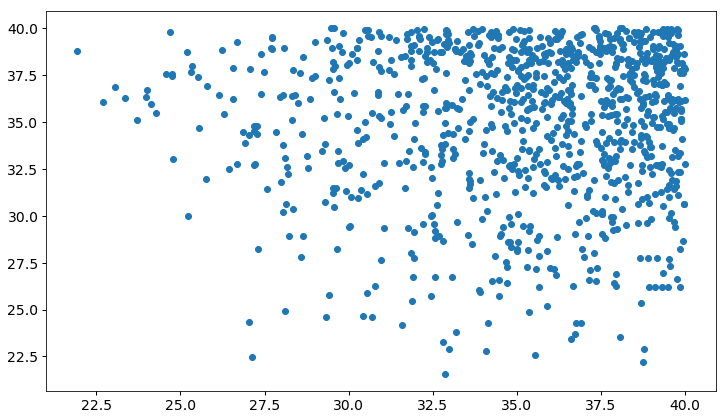

In [148]:
# plt.scatter(latlon_normal[:, 0], latlon_normal[:, 1])
plt.scatter(latlon_power[:, 0], latlon_power[:, 1])
plt.show()

In [149]:
t1 = time.time()
tree_uniform = BallTree(latlon_uniform)
t2 = time.time()
print(runtime2str(t2 - t1))

1 ms


In [150]:
t1 = time.time()
tree_normal = BallTree(latlon_normal)
t2 = time.time()
print(runtime2str(t2 - t1))

501 μs


In [151]:
t1 = time.time()
tree_power = BallTree(latlon_power)
t2 = time.time()
print(runtime2str(t2 - t1))

508 μs


In [152]:
# ind = tree.query_radius(latlon[:4], r=3)
# print(ind)

In [153]:
r = np.logspace(-3, 2, 50)

t1 = time.time()
tpc_uniform = tree_uniform.two_point_correlation(latlon_uniform, r)
# tpc_uniform = tree_uniform.two_point_correlation(latlon_uniform, r, dualtree=True)
t2 = time.time()
print(runtime2str(t2 - t1))

26.5 ms


In [154]:
t1 = time.time()
tpc_normal = tree_normal.two_point_correlation(latlon_normal, r)
t2 = time.time()
print(runtime2str(t2 - t1))

31.1 ms


In [155]:
t1 = time.time()
tpc_power = tree_power.two_point_correlation(latlon_power, r)
t2 = time.time()
print(runtime2str(t2 - t1))

28.6 ms


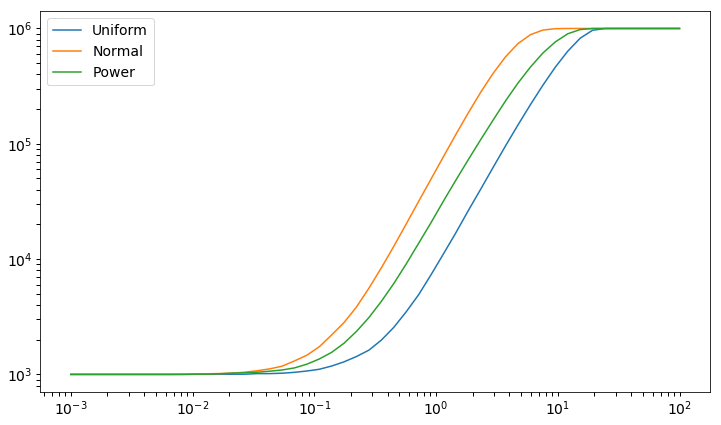

In [156]:
plt.loglog(r, tpc_uniform, label="Uniform")
plt.loglog(r, tpc_normal, label="Normal")
plt.loglog(r, tpc_power, label="Power")
# plt.loglog(r, tpc_uniform / np.max(tpc_uniform), label="Uniform")
# plt.loglog(r, tpc_normal / np.max(tpc_normal), label="Normal")
# plt.loglog(r, tpc_power / np.max(tpc_power), label="Power")

plt.legend()
plt.show()

In [192]:
N = 10000

latlon_uniform = 20 + 20 * np.random.random((N, 2))
latlon_normal = 30 + 2*np.random.randn(N, 2)
latlon_power = 20 + 20*np.random.power(a=3, size=(N,2))

bins = np.logspace(-2, 1, 100)

corr_uniform = two_point(latlon_uniform, bins)
corr_normal = two_point(latlon_normal, bins)
corr_power = two_point(latlon_power, bins)

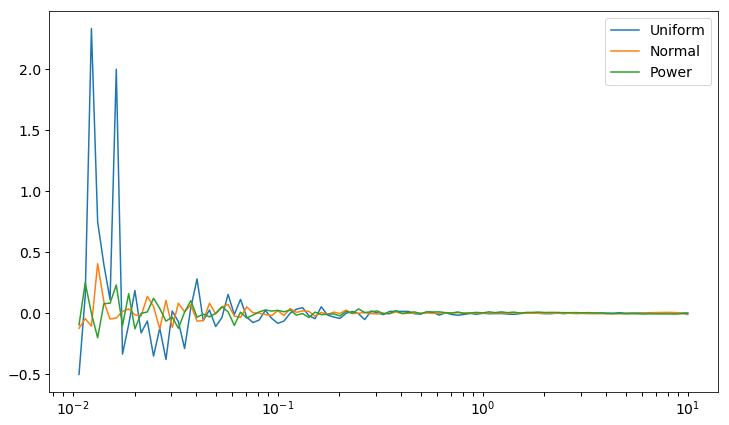

In [193]:
plt.semilogx(bins[1:], corr_uniform, label="Uniform")
plt.semilogx(bins[1:], corr_normal, label="Normal")
plt.semilogx(bins[1:], corr_power, label="Power")
plt.legend()
plt.show()